# WMA - projekt 5

Student Błażej Kozieł 

## 1. Import bibliotek

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt

## 2. Pobranie danych

In [ ]:
df = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = df.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print(f'Wymiar danych zbioru treningowego: {train_images.shape}')
print(f'Wymiar danych zbioru testowego: {test_images.shape}')

Wymiar danych zbioru treningowego: (50000, 32, 32, 3)
Wymiar danych zbioru testowego: (10000, 32, 32, 3)


In [ ]:
print(train_labels.shape)

(50000, 1)


In [ ]:
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

In [ ]:
print(f'Wymiar danych zbioru treningowego: {images.shape}')
print(f'Wymiar danych zbioru testowego: {labels.shape}')

Wymiar danych zbioru treningowego: (60000, 32, 32, 3)
Wymiar danych zbioru testowego: (60000, 1)


Dzielimy nasz zbiór, gdzie training set to 84%, zaś test set to 16%

In [ ]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, 
                                                    shuffle = True, 
                                                    test_size=0.16, 
                                                    random_state=50)

In [ ]:
print(f'Wymiar danych zbioru treningowego: {train_images.shape}')
print(f'Wymiar danych zbioru testowego: {test_images.shape}')

Wymiar danych zbioru treningowego: (50400, 32, 32, 3)
Wymiar danych zbioru testowego: (9600, 32, 32, 3)


## 3. Przykład próbek

In [ ]:
class_names = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

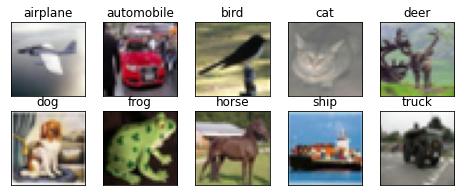

In [ ]:
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_images[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(0,1,2))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

## 4. Architektura modelu

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                        

## 5. Normalizacja danych

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0
train_images = train_images.reshape(50400, 32, 32, 3)
test_images = test_images.reshape(9600, 32, 32, 3)
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

## 6. Trening sieci

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=32, epochs=10)

Epoch 1/10
1575/1575 [==============================] - 277s 175ms/step - loss: 1.6490 - accuracy: 0.3922
Epoch 2/10
1575/1575 [==============================] - 276s 175ms/step - loss: 1.2124 - accuracy: 0.5644
Epoch 3/10
1575/1575 [==============================] - 280s 178ms/step - loss: 1.0254 - accuracy: 0.6361
Epoch 4/10
1575/1575 [==============================] - 292s 186ms/step - loss: 0.9289 - accuracy: 0.6693
Epoch 5/10
1575/1575 [==============================] - 278s 177ms/step - loss: 0.8513 - accuracy: 0.6998
Epoch 6/10
1575/1575 [==============================] - 278s 176ms/step - loss: 0.7919 - accuracy: 0.7190
Epoch 7/10
1575/1575 [==============================] - 278s 176ms/step - loss: 0.7439 - accuracy: 0.7363
Epoch 8/10
1575/1575 [==============================] - 278s 177ms/step - loss: 0.7026 - accuracy: 0.7511
Epoch 9/10
1575/1575 [==============================] - 279s 177ms/step - loss: 0.6635 - accuracy: 0.7643
Epoch 10/10
1575/1575 [=======================

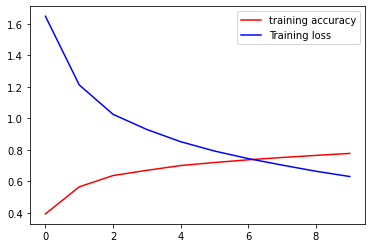

In [ ]:
plt.plot(history.history['accuracy'], 'r', label = 'training accuracy')
plt.plot(history.history['loss'], 'b', label='Training loss')
plt.legend()
plt.show()

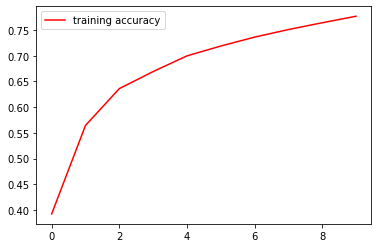

In [ ]:
plt.plot(history.history['accuracy'], 'r', label = 'training accuracy')
plt.legend()
plt.show()

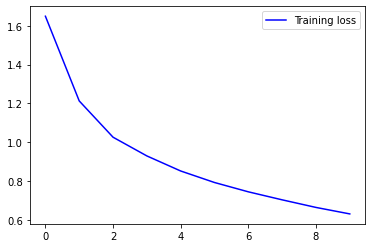

In [ ]:
plt.plot(history.history['loss'], 'b', label='Training loss')
plt.legend()
plt.show()

## 7. Ewaluacja modelu

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

300/300 [==============================] - 13s 41ms/step - loss: 1.0222 - accuracy: 0.6697


## 8. Przykład danych testowych

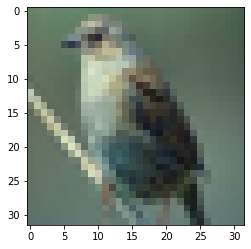

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2
bird


In [ ]:
plt.imshow(test_images[2], cmap=plt.cm.binary)
plt.show()
print(test_labels[2])
print(np.argmax(test_labels[2]))
print(class_names[np.argmax(test_labels[2])])

## 9. Predykcja dla losowej próbki z danych testowych

In [ ]:
from random import randint
value = randint(0, 9599)
sample = test_images[value:value+1][:][:][:]
#print(sample.shape)
#print(test_images.shape)
y_pred = model.predict(sample)
y_true = sample

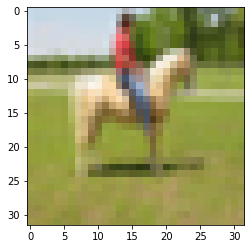

[[3.2784713e-03 6.4236563e-05 1.3348318e-02 3.3431762e-04 7.3772572e-02
  1.2615432e-03 5.4933626e-06 9.0704179e-01 8.9022267e-04 3.0348483e-06]]
7
horse


In [ ]:
plt.imshow(sample[0], cmap=plt.cm.binary)
plt.show()
print(y_pred)
print(np.argmax(y_pred))
print(class_names[np.argmax(y_pred)])